# **Importing Modules**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# **Cleaning Data**


---


We clean the data using Pandas. A specific outlier is removed, which is a Youtube channel with an inaccurate date of 1970. We reformat the table to our appropriate format. The dataset is exported using Pickle to be used in our regression neural network.

In [7]:

df = pd.read_csv('/content/drive/MyDrive/most_subscribed_youtube_channels.csv')
#Removing the commas in each string of our subscribers, video counts, coverting into integer
for col in ["subscribers", "video views", "video count"]:
  df[col] = df[col].str.replace(",", "").astype(int)

#Creating Age Column
df['Age'] = 2023 - df['started']
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started,Age
0,1,T-Series,222000000,198459090822,17317,Music,2006,17
1,2,YouTube Movies,154000000,0,0,Film & Animation,2015,8
2,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education,2006,17
3,4,SET India,139000000,125764252686,91271,Shows,2006,17
4,5,Music,116000000,0,0,NaN,2013,10


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   int64 
 3   video views  1000 non-null   int64 
 4   video count  1000 non-null   int64 
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
 7   Age          1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


In [19]:
df.describe()

,rank,subscribers,video views,video count,started,Age
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.500000,2.051940e+07,9.197025e+09,8551.059000,2012.376000,10.624000
std,288.819436,1.578167e+07,1.207128e+10,29359.950431,3.998076,3.998076
min,1.000000,1.090000e+07,0.000000e+00,0.000000,1970.000000,2.000000
25%,250.750000,1.260000e+07,3.582208e+09,342.250000,2010.000000,8.000000
50%,500.500000,1.550000e+07,6.116574e+09,856.000000,2013.000000,10.000000
75%,750.250000,2.210000e+07,1.124951e+10,3060.500000,2015.000000,13.000000
max,1000.000000,2.220000e+08,1.984591e+11,329711.000000,2021.000000,53.000000


# **Displaying Advanced Statistics**


---


We display the mean, median, variance, and standard deviation, for the channels' subscribers, video views, video count, and age (as of 2022)

In [8]:
#Number of Subscribers
print(f'The average amount of subscribers is {(round(1_000_000 * df["subscribers"].mean(), 2)):,}')
print(f'The median amount of subscribers is {round(1_000_000 * df["subscribers"].median(), 2):,}')
print(f'The variance of subscribers is {round(1_000_000 * df["subscribers"].var(), 2):,}')
print(f'The standard deviation of subscribers is {round(df["subscribers"].std(), 2):,} \n')


#Video Views
print(f'The average amount of video views is {round(1_000_000 * df["video views"].mean(), 2):,}')
print(f'The median amount of video views is {round(1_000_000 * df["video views"].median(), 2):,}')
print(f'The variance of video views is {round(df["video views"].var(), 2):,}')
print(f'The standard deviation of video views is {round(df["video views"].std(), 2):,} \n')

#Video Count
print(f'The average video count is {round(1000 * df["video count"].mean(), 2):,}')
print(f'The median video count is {round(1000 * df["video count"].median(), 2):,}')
print(f'The variance video count is {round(1000 * df["video count"].var(), 2):,}')
print(f'The standard deviation of the video count is {round(df["video count"].std(), 2):,} \n')

#Age
print("The average age is: ", round(df["Age"].mean(), 2))
print("The median age is: ", round(df["Age"].median(), 2))
print("The variance of the ages is: ", round(df["Age"].var(), 2))
print("The standard deviation of the ages is: ", round(df["Age"].std(), 2), "\n")


The average amount of subscribers is 20,519,400,000,000.0
The median amount of subscribers is 15,500,000,000,000.0
The variance of subscribers is 2.490610446846847e+20
The standard deviation of subscribers is 15,781,667.99 

The average amount of video views is 9,197,024,545,774,000.0
The median amount of video views is 6,116,574,063,000,000.0
The variance of video views is 1.4571577035774735e+20
The standard deviation of video views is 12,071,278,737.47 

The average video count is 8,551,059.0
The median video count is 856,000.0
The variance video count is 862,006,689,286.81
The standard deviation of the video count is 29,359.95 

The average age is:  10.62
The median age is:  10.0
The variance of the ages is:  15.98
The standard deviation of the ages is:  4.0 



# **Visualization**



---


### **Aggregate Video Views per Category**


---
We visualize the aggregate video views for each category through matplotlib, creating a bar chart.


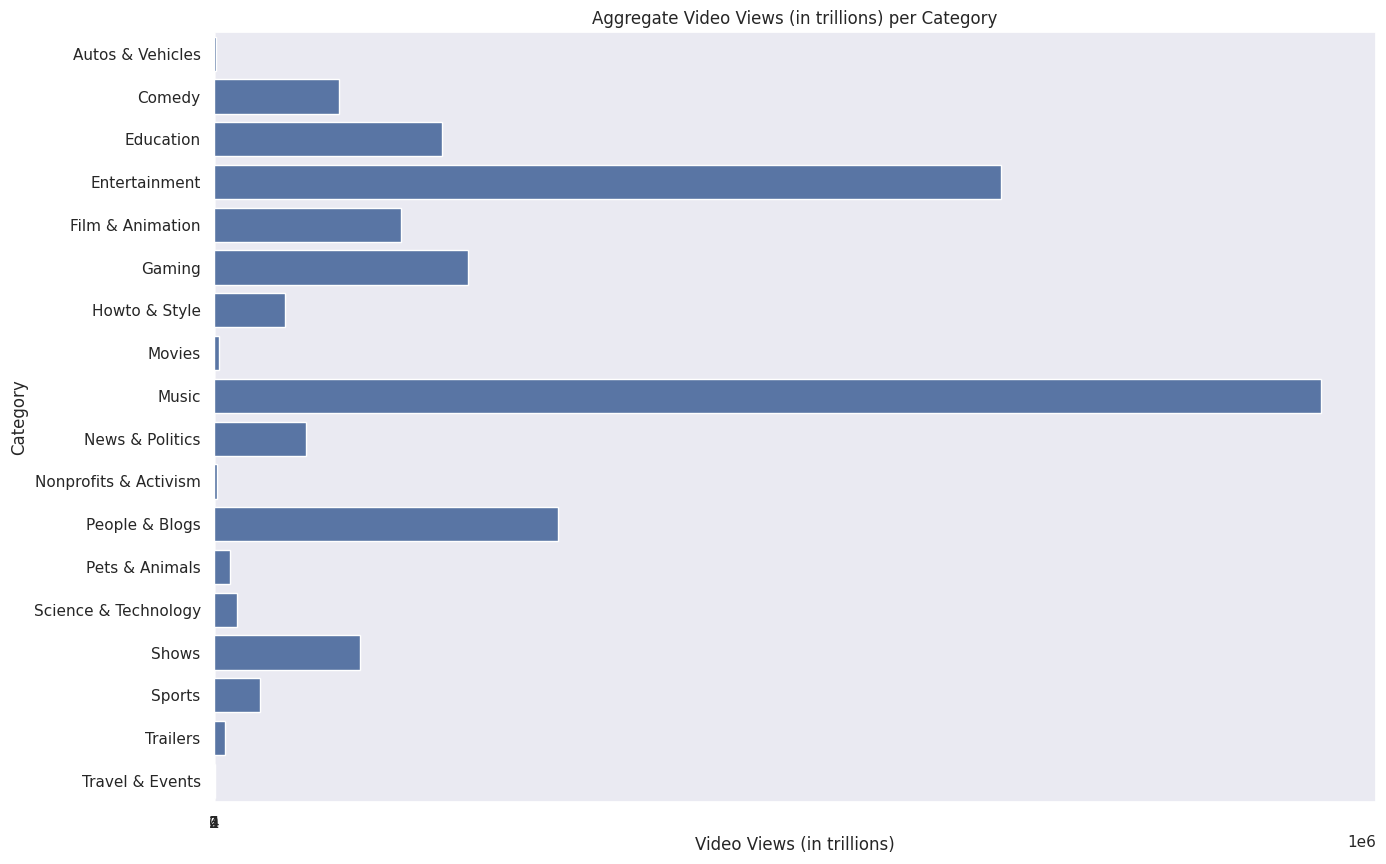

In [30]:
# Grouping and aggregating
groupedByCat = df.groupby(["category"], as_index=False)["video views"].sum()
# Plotting
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = groupedByCat['video views'], y = groupedByCat['category'], orient = 'h');

# Formatting
plt.xticks(range(0, 5000000, 1000000))
plt.xlabel("Video Views (in trillions)")
plt.ylabel("Category")
plt.title("Aggregate Video Views (in trillions) per Category")

plt.show()

# **Category column Plot**

Text(0.5, 1.0, 'Histogram Plot for Category')

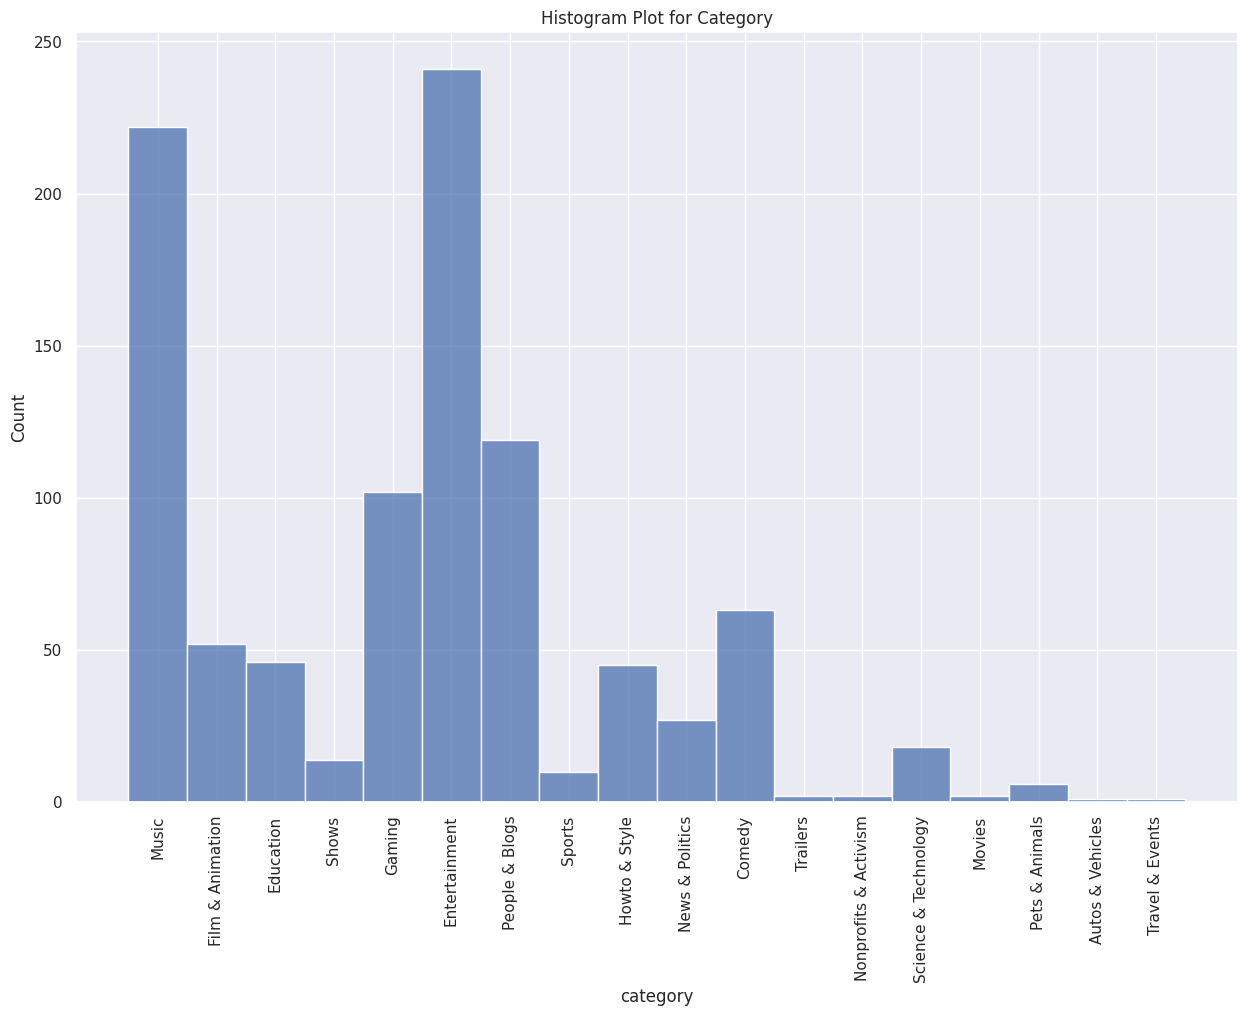

In [42]:
##histogram chart for category column
plt.figure(figsize=(15,10))
sns.histplot(df['category'])
plt.xticks(rotation=90)
plt.title('Histogram Plot for Category')

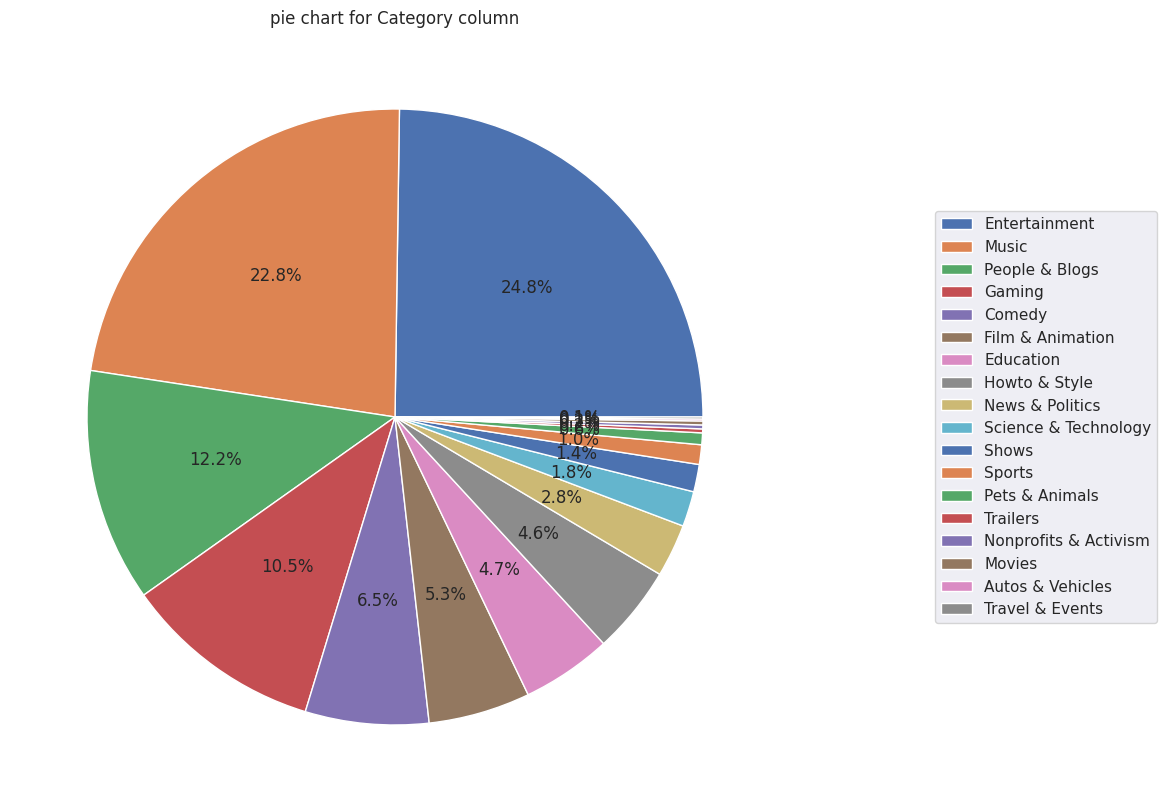

In [35]:
#pie chart for category column
category=df['category'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(category,  autopct='%1.1f%%')
plt.legend(category.index, loc = 'right',  bbox_to_anchor=(1.5,0.5))
plt.title('Pie Chart for Category column')
plt.show()

# **Aggregate subscribers per Category**

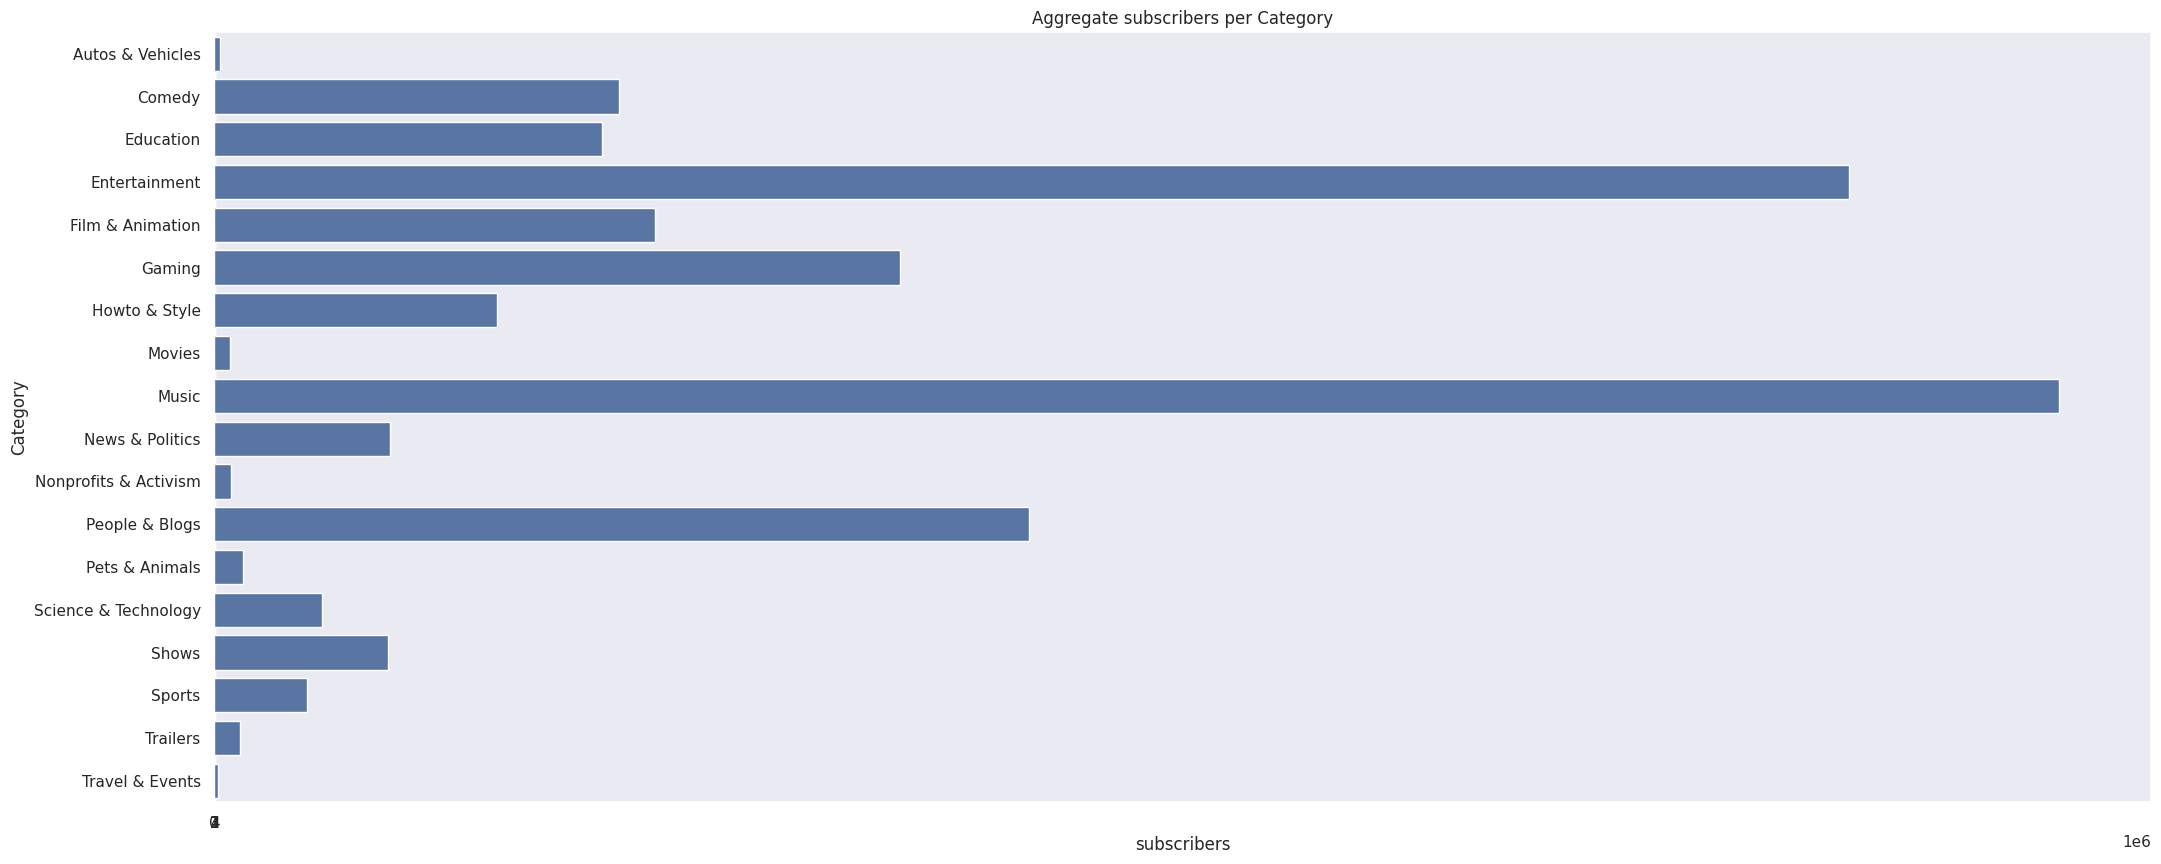

In [15]:
# Grouping and aggregating
groupedByCat = df.groupby(["category"], as_index=False)["subscribers"].sum()

# Plotting
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x = groupedByCat['subscribers'], y = groupedByCat['category'], orient = 'h');

# Formatting
plt.xticks(range(0, 5000000, 1000000))
plt.xlabel("subscribers")
plt.ylabel("Category")
plt.title("Aggregate subscribers per Category")

plt.show()

Music category has most subscribers. It shoulbe because many believe music as yoga or healing medicine.



---


### Aggregate Video Views for Age of Channel


---



Text(0, 0.5, 'Views (in millions)')

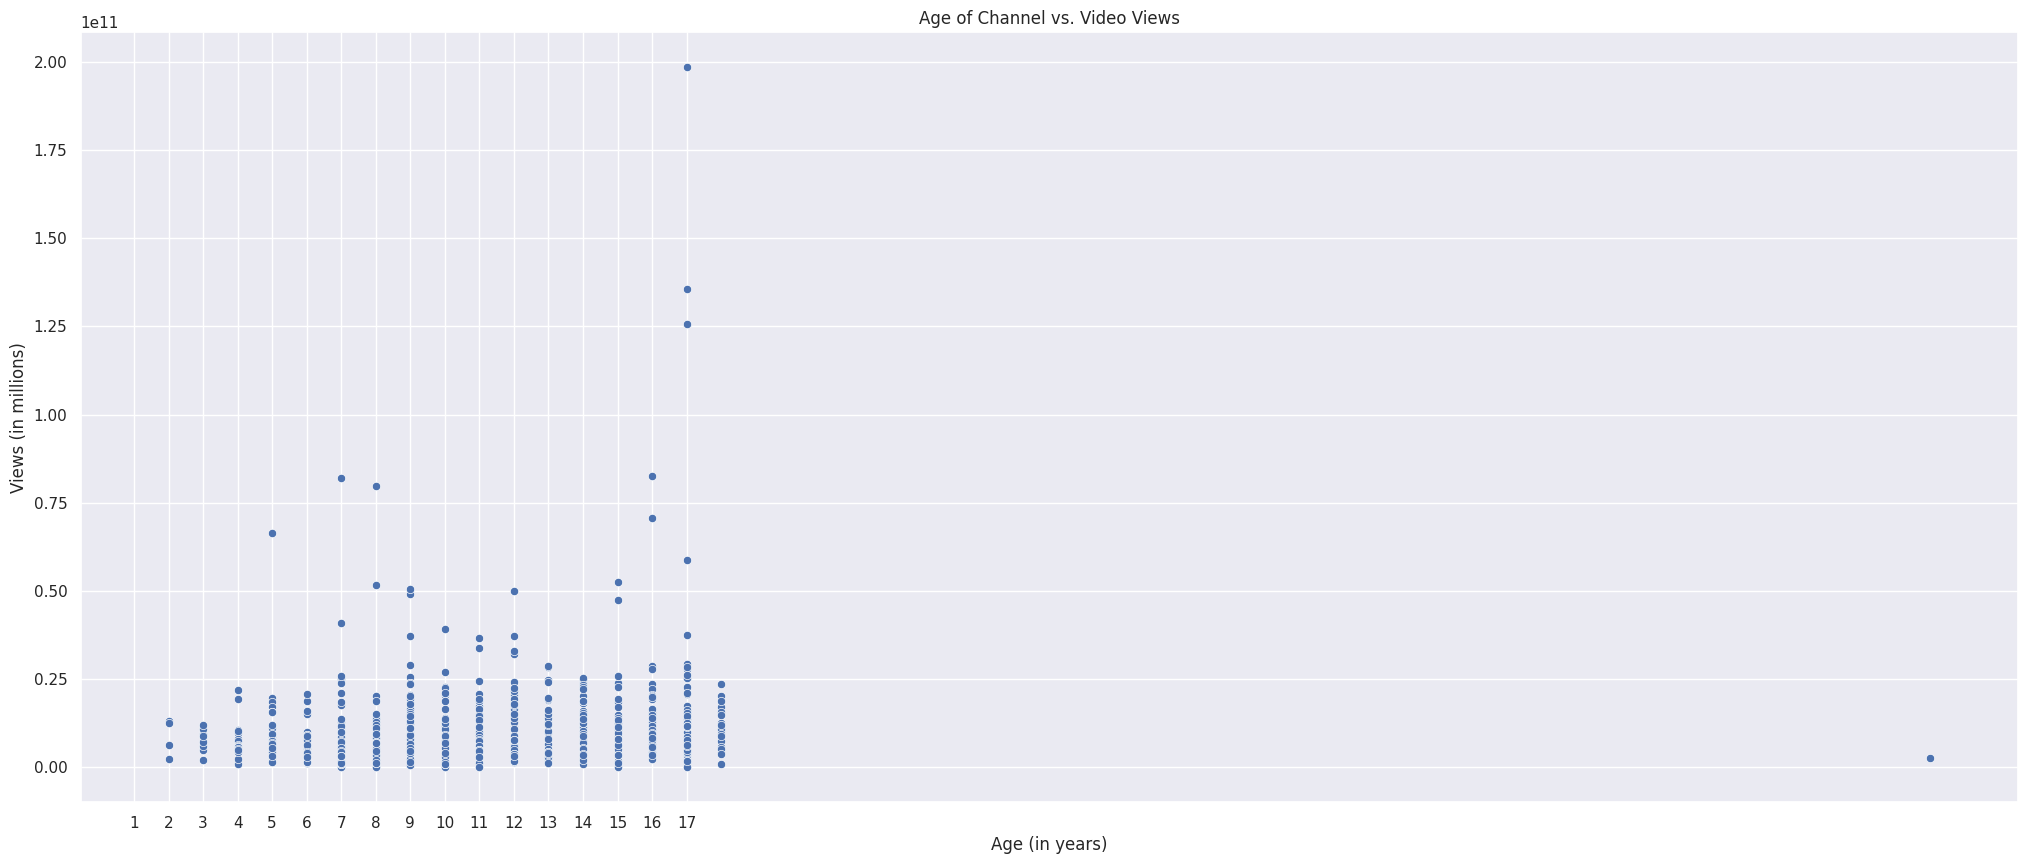

In [14]:
#Scatter plot Graphing
sns.set(rc={'figure.figsize':(25,10)})
sns.scatterplot(x = df['Age'], y = df['video views']);

#plt.scatter(df["Age"], df["Video Views"])
plt.title("Age of Channel vs. Video Views")

plt.xticks(range(1,18))
plt.xlabel("Age (in years)")
plt.ylabel("Views (in millions)")




---


### Aggregate Video Views for Each Channel

---



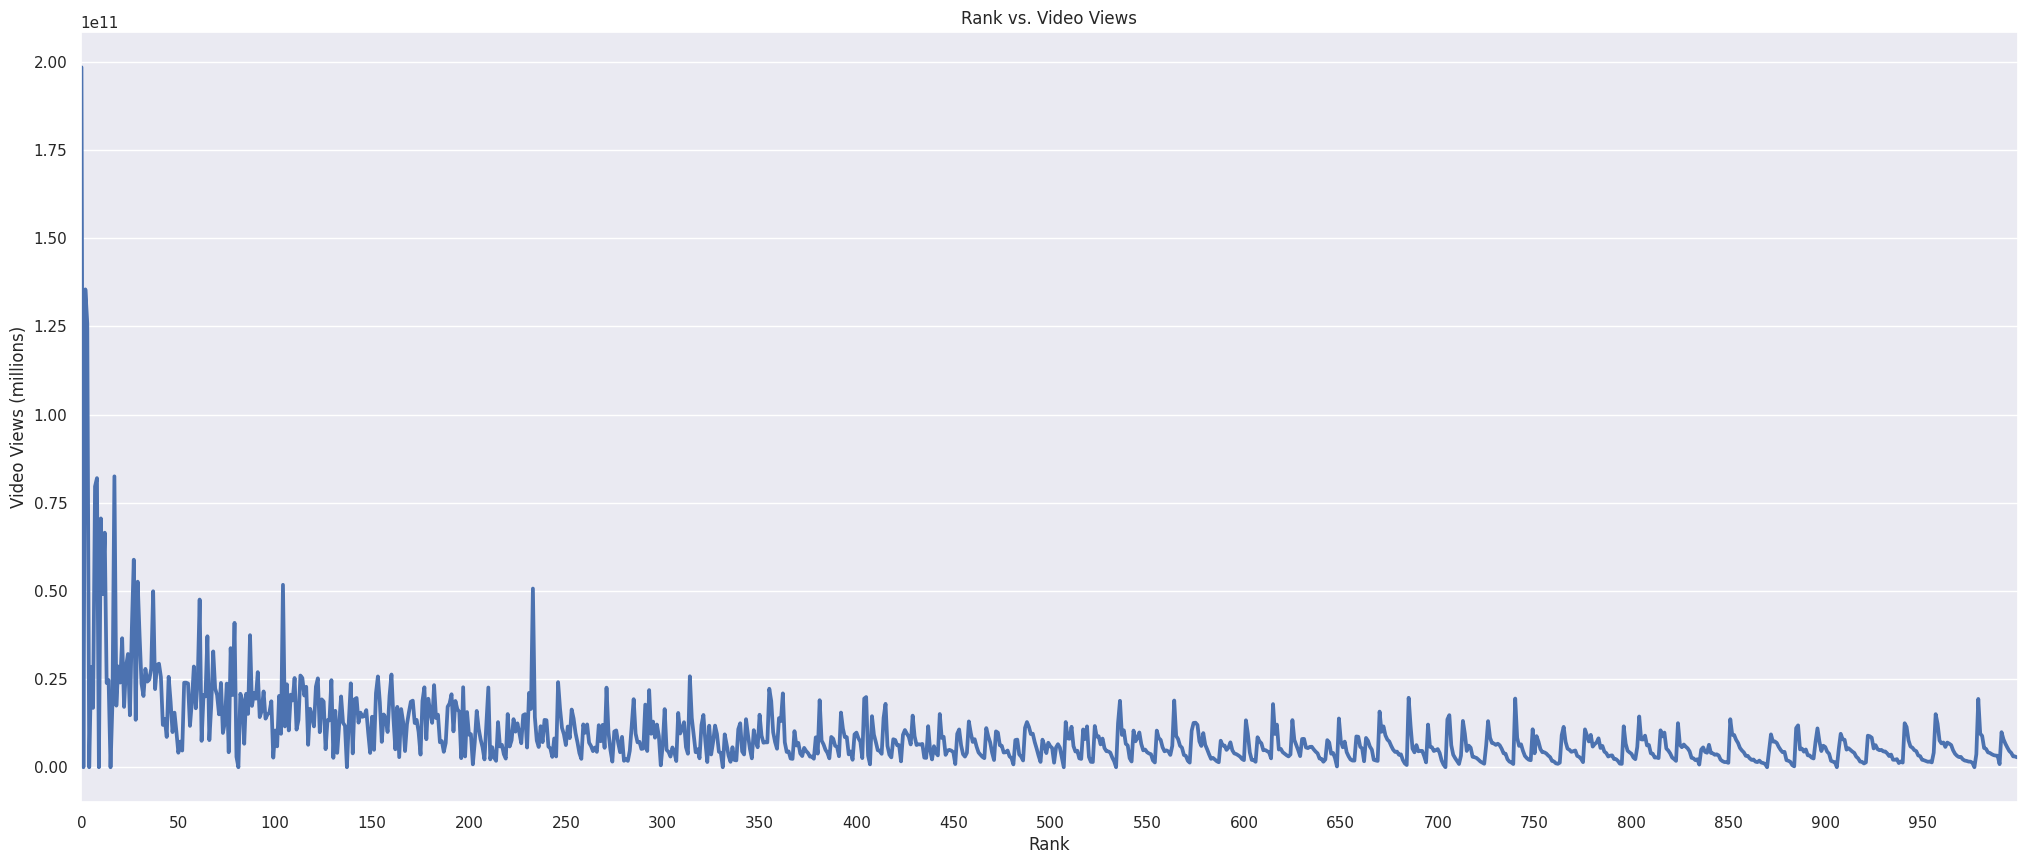

In [16]:
sns.set(rc={'figure.figsize':(25,10)})
sns.pointplot(x = df["rank"], y = df["video views"], markers = '');

plt.title("Rank vs. Video Views")
plt.xlabel("Rank")
plt.ylabel("Video Views (millions)")

plt.xticks(range(0, df["rank"].max(), 50), range(0, df["rank"].max(), 50));



---

### Top 1000 Youtube Channel Creation for Each Year


---



Text(0.5, 1.0, 'Year of Channel Creation vs. Numbers of Channels Created')

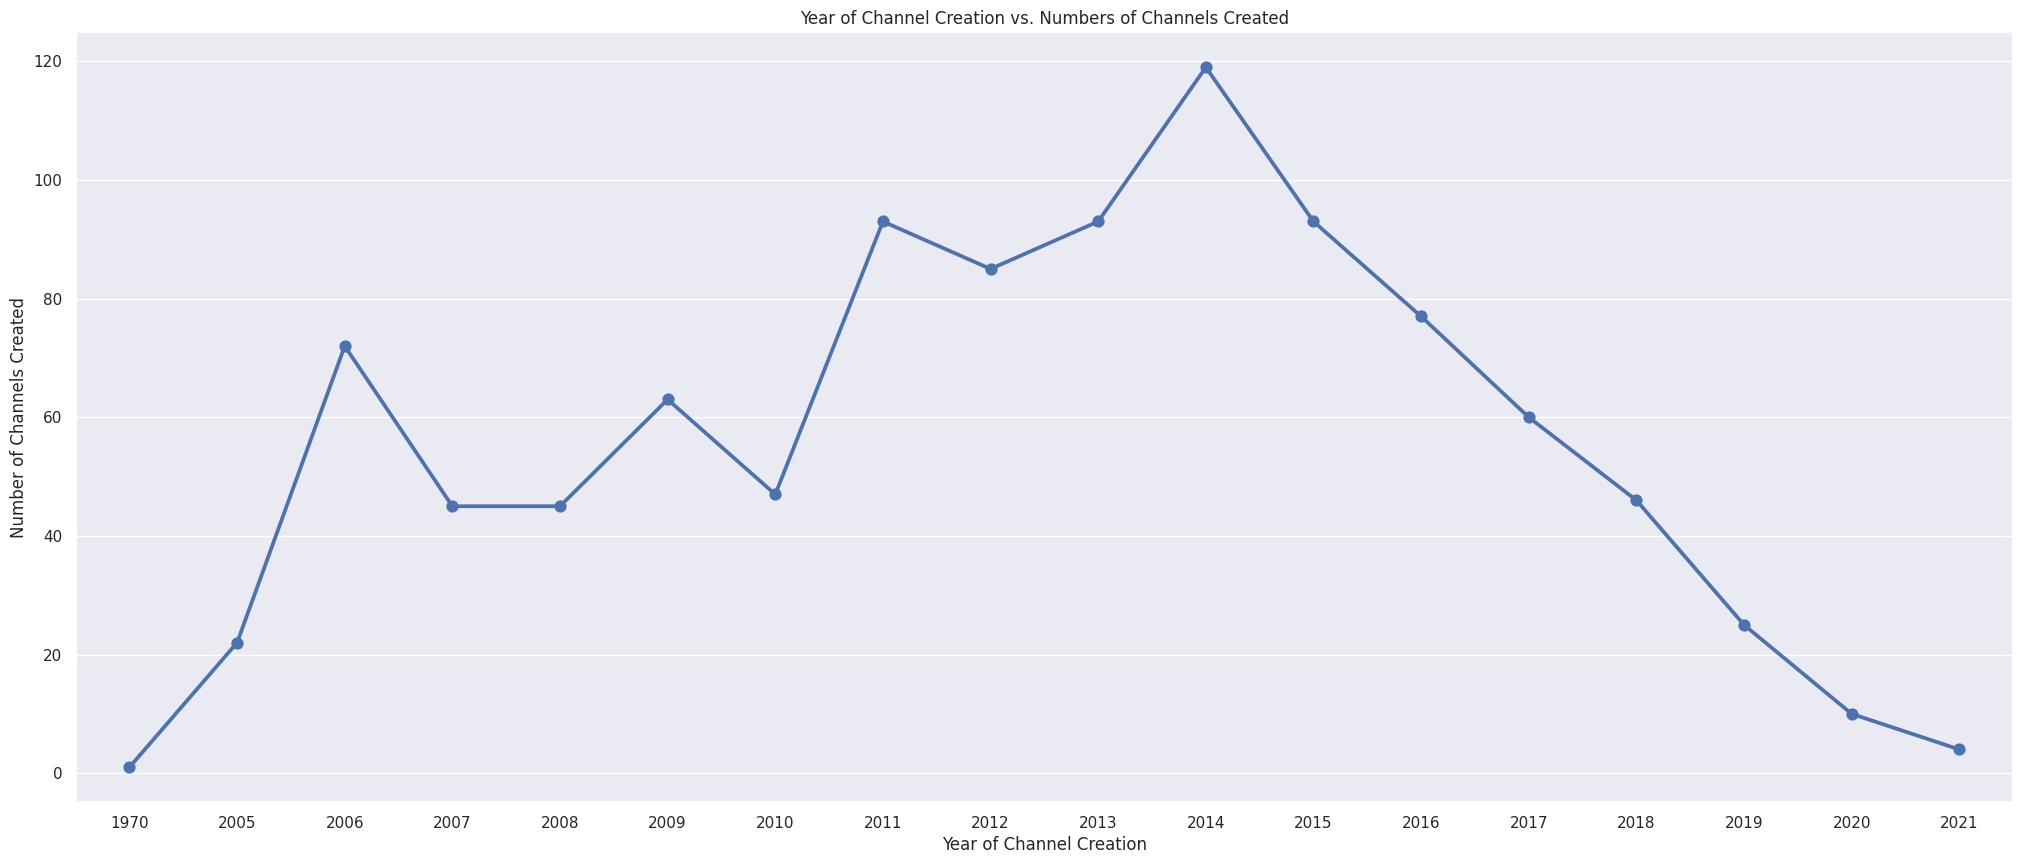

In [17]:
yearstarted = df['started'].value_counts()

sns.set(rc={'figure.figsize':(25,10)})
sns.pointplot(x = yearstarted.index, y = yearstarted.values)

plt.xlabel("Year of Channel Creation")
plt.ylabel("Number of Channels Created")
plt.title("Year of Channel Creation vs. Numbers of Channels Created")

# **Distribution, KDE, BOX plot**

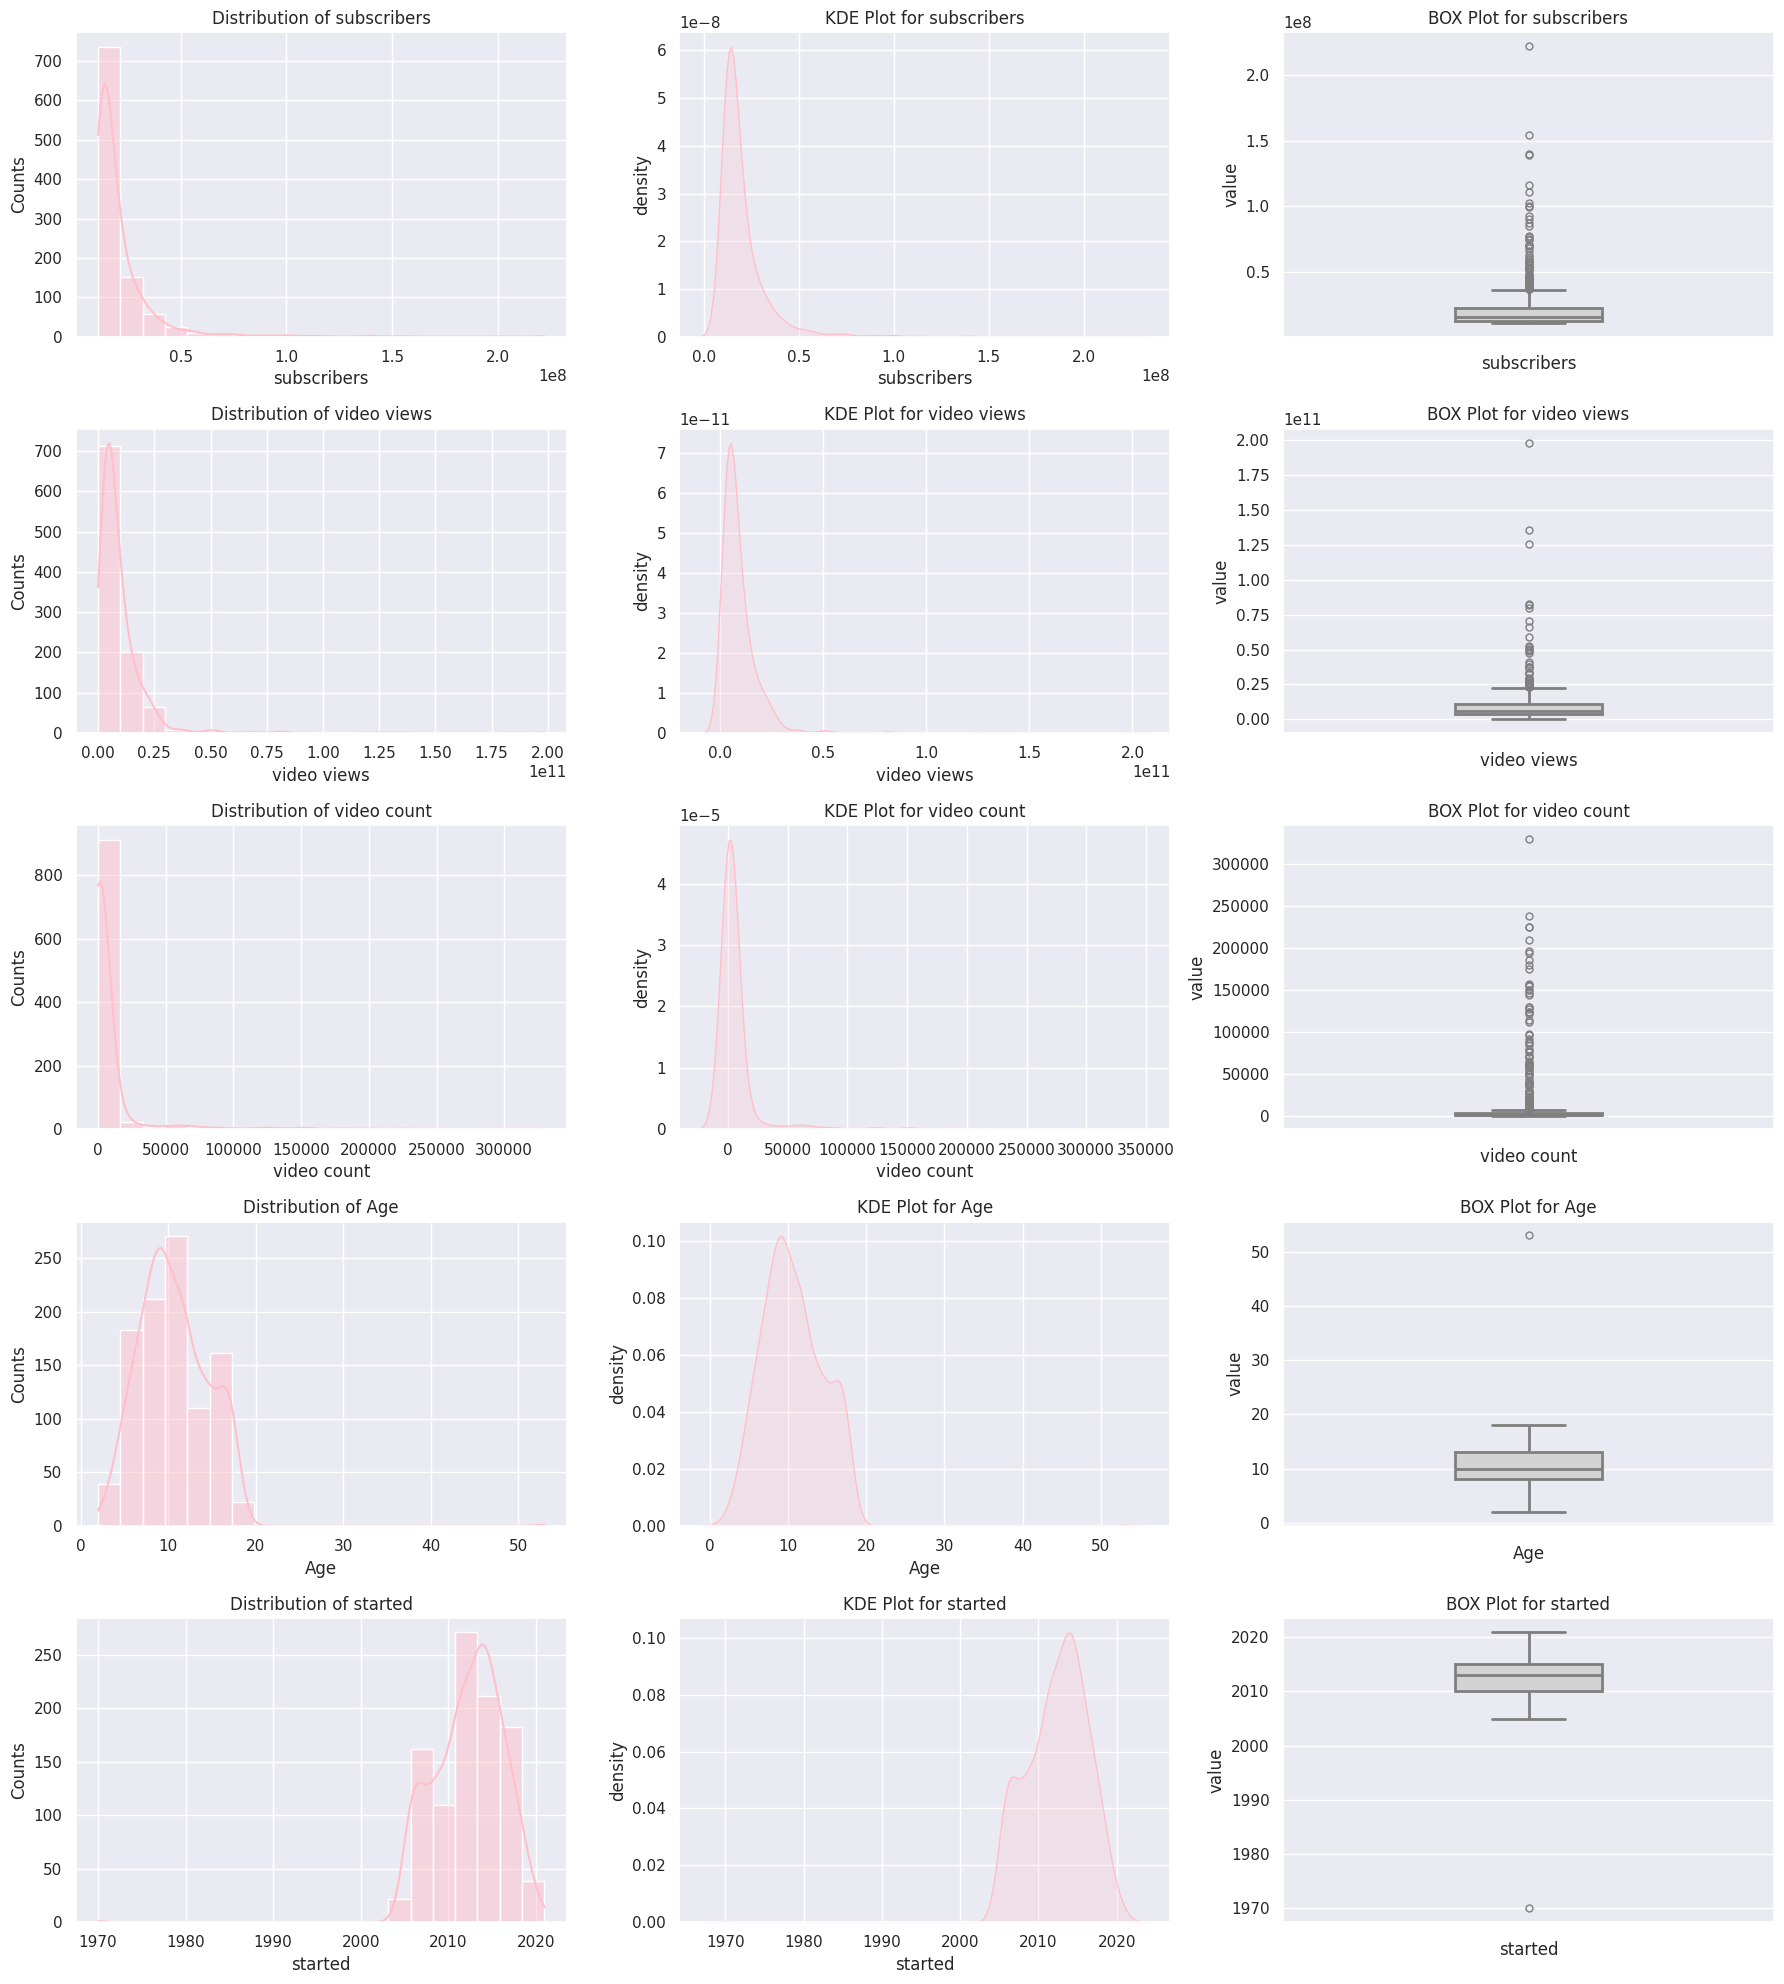

In [51]:
# set figure and axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))

# define the columns you want to plot
columns_to_plot = ['subscribers', 'video views', 'video count', 'Age', 'started']

for i, column in enumerate(columns_to_plot):
    # let's plot distribution curve
    sns.histplot(df[column], bins=20, color='pink', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Counts')

    # let's plot kde curve
    sns.kdeplot(df[column], fill=True, color='pink', ax=axes[i, 1])
    axes[i, 1].set_title(f'KDE Plot for {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('density')

    # box plot
    sns.boxplot(df[column], color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[i, 2])
    axes[i, 2].set_title(f'BOX Plot for {column}')
    axes[i, 2].set_xlabel(column)
    axes[i, 2].set_ylabel('value')

plt.tight_layout()
plt.show()


# **Correlation heatmap**

<Axes: >

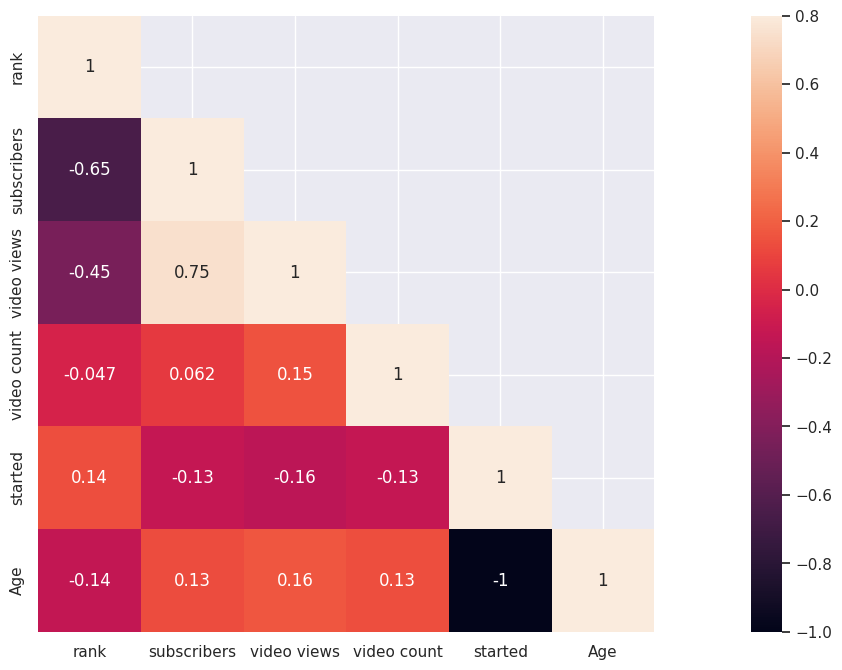

In [54]:
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.heatmap(df.corr(), mask = mask, vmax =.8, square = True, annot = True)

**We can notice that there's high correlation 0.82 with subscribers and video views.**

**From all this visualization we conclude that  Music, education, Film & Animation are top3 categories that have most subscribers.**
- Includes: T-Series, YouTube Movies and Cocomelon - Nuresery Rhymes**